In [ ]:
!sudo apt-get update -y
!sudo apt-get install python3.10 python3.10-distutils python3.10-dev -y
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 2
!sudo update-alternatives --config python3


# 1 instalacion de librerias necesarias

In [ ]:
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 88.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


# 2. Descarga de dataset personalizado desde Roboflow

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="oM4tsslDCyceXPEmfdwj")
project = rf.workspace("test1mrm").project("customlogomercedez-hxxq6")
version = project.version(2)
dataset = version.download("yolov11")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to customLogoMercedez-2 in yolov11:: 100%|██████████| 854/854 [00:00<00:00, 8104.39it/s]


# 3. Cargar el modelo base Yolov11

In [ ]:
from ultralytics import YOLO
model = YOLO("yolo11s.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# 4. Entrenamiento del modelo personalizado.

In [ ]:
data_path ="/content/customLogoMercedez-2/data.yaml"
results = model.train(data=data_path,
                      epochs=50,
                      imgsz=640)

Ultralytics 8.3.186 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/customLogoMercedez-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0,

# 5. predicciones 🎩


In [ ]:
# cargamos el modelo ya entrenado
custom_model =YOLO("/content/runs/detect/train/weights/best.pt")

In [ ]:
# Realizamos predicciones sobre algunas imagenes
res= custom_model.predict(source="/content/customLogoMercedez-2/test/images")


image 1/40 /content/customLogoMercedez-2/test/images/BN827124_8b72dd_jpg.rf.54ee2fa91c820c80c84831d7a8372768.jpg: 640x640 1 logo_mercedez, 18.3ms
image 2/40 /content/customLogoMercedez-2/test/images/images132_jpg.rf.c3ff5fca9604cec58b0fe31035d07847.jpg: 640x640 1 logo_mercedez, 15.6ms
image 3/40 /content/customLogoMercedez-2/test/images/images157_jpg.rf.1492f262e22c8daeeb9451d8e1a1bee7.jpg: 640x640 1 logo_mercedez, 15.6ms
image 4/40 /content/customLogoMercedez-2/test/images/images161_jpg.rf.1387383047c25f7a46e86d0282e9eb4d.jpg: 640x640 1 logo_mercedez, 15.6ms
image 5/40 /content/customLogoMercedez-2/test/images/images164_jpg.rf.f1ccbe5bcb3df868a0a65bea3e174296.jpg: 640x640 1 logo_mercedez, 15.6ms
image 6/40 /content/customLogoMercedez-2/test/images/images165_jpg.rf.0555d0b5225a899a8ffb0f5264e55736.jpg: 640x640 1 logo_mercedez, 16.4ms
image 7/40 /content/customLogoMercedez-2/test/images/images168_jpg.rf.6245ea476fce944fed1da347670b6f80.jpg: 640x640 (no detections), 15.6ms
image 8/40 /c

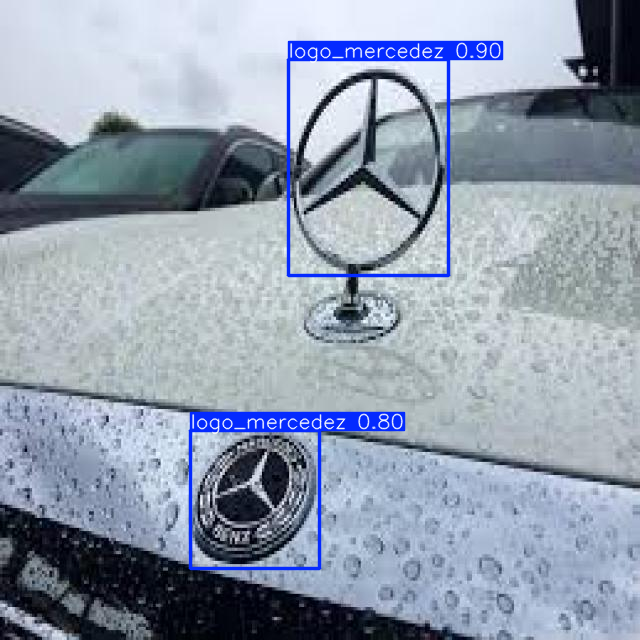

In [ ]:
# Vizualizacion de los resultados de las detecciones
res[28].show()